# Data exploration

We'll explore the block groups data in this notebook. First, we'll use only Pandas and then we'll plot some maps with geopandas.

## First, we use Pandas

Reading the data:

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("../data/raw/block-groups.csv")
df

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,170010001001,2000,1.1,"Adams County, Illinois",1058.00,10.14,41.0,10.25,459.00,44028.00,...,0.00,0.57,0.00,1.0,1.0,2.44,2.44,1,0,0
1,170010001001,2001,1.1,"Adams County, Illinois",1058.00,10.14,42.0,10.25,459.00,44028.00,...,0.00,0.57,0.00,0.0,0.0,0.00,0.00,1,0,0
2,170010001001,2002,1.1,"Adams County, Illinois",1058.00,10.14,43.0,10.25,459.00,44028.00,...,0.00,0.57,0.00,5.0,2.0,4.63,11.57,1,0,0
3,170010001001,2003,1.1,"Adams County, Illinois",1058.00,10.14,44.0,10.25,459.00,44028.00,...,0.00,0.57,0.00,1.0,1.0,2.26,2.26,1,0,0
4,170010001001,2004,1.1,"Adams County, Illinois",1058.00,10.14,45.0,10.25,459.00,44028.00,...,0.00,0.57,0.00,1.0,1.0,2.20,2.20,1,0,0
5,170010001001,2005,1.1,"Adams County, Illinois",980.00,4.31,47.0,5.36,448.00,73267.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1,0,0
6,170010001001,2006,1.1,"Adams County, Illinois",980.00,4.31,48.0,5.36,448.00,73267.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1,0,0
7,170010001001,2007,1.1,"Adams County, Illinois",980.00,4.31,49.0,5.36,448.00,73267.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1,0,0
8,170010001001,2008,1.1,"Adams County, Illinois",980.00,4.31,50.0,5.36,448.00,73267.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1,0,0
9,170010001001,2009,1.1,"Adams County, Illinois",980.00,4.31,51.0,5.36,448.00,73267.00,...,0.00,0.00,0.00,1.0,1.0,1.96,1.96,1,0,0


In [2]:
df.dtypes

GEOID                           int64
year                            int64
name                           object
parent-location                object
population                    float64
poverty-rate                  float64
renter-occupied-households    float64
pct-renter-occupied           float64
median-gross-rent             float64
median-household-income       float64
median-property-value         float64
rent-burden                   float64
pct-white                     float64
pct-af-am                     float64
pct-hispanic                  float64
pct-am-ind                    float64
pct-asian                     float64
pct-nh-pi                     float64
pct-multiple                  float64
pct-other                     float64
eviction-filings              float64
evictions                     float64
eviction-rate                 float64
eviction-filing-rate          float64
low-flag                        int64
imputed                         int64
subbed      

Types are ok.

Since we only care about the city of Chicago for this, we'll filter the dataframe to keep only Chicagoan block groups. We define "Chicagoan" as located in the Cook county.

In [3]:
df = df[df['parent-location']=='Cook County, Illinois']
df

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
8364,170310101001,2000,101.1,"Cook County, Illinois",664.99,33.98,198.0,87.10,544.0,27692.0,...,0.06,3.21,1.02,38.0,0.0,0.00,19.16,0,0,0
8365,170310101001,2001,101.1,"Cook County, Illinois",664.99,33.98,194.0,87.10,544.0,27692.0,...,0.06,3.21,1.02,31.0,0.0,0.00,16.02,0,0,0
8366,170310101001,2002,101.1,"Cook County, Illinois",664.99,33.98,189.0,87.10,544.0,27692.0,...,0.06,3.21,1.02,11.0,0.0,0.00,5.83,0,0,0
8367,170310101001,2003,101.1,"Cook County, Illinois",664.99,33.98,184.0,87.10,544.0,27692.0,...,0.06,3.21,1.02,16.0,0.0,0.00,8.70,0,0,0
8368,170310101001,2004,101.1,"Cook County, Illinois",664.99,33.98,179.0,87.10,544.0,27692.0,...,0.06,3.21,1.02,12.0,0.0,0.00,6.70,0,0,0
8369,170310101001,2005,101.1,"Cook County, Illinois",596.41,33.66,174.0,80.24,702.0,30708.0,...,0.00,4.90,0.00,3.0,0.0,0.00,1.72,0,0,0
8370,170310101001,2006,101.1,"Cook County, Illinois",596.41,33.66,169.0,80.24,702.0,30708.0,...,0.00,4.90,0.00,16.0,6.0,3.54,9.45,0,0,0
8371,170310101001,2007,101.1,"Cook County, Illinois",596.41,33.66,165.0,80.24,702.0,30708.0,...,0.00,4.90,0.00,23.0,7.0,4.25,13.98,0,0,0
8372,170310101001,2008,101.1,"Cook County, Illinois",596.41,33.66,160.0,80.24,702.0,30708.0,...,0.00,4.90,0.00,17.0,9.0,5.64,10.65,0,0,0
8373,170310101001,2009,101.1,"Cook County, Illinois",596.41,33.66,155.0,80.24,702.0,30708.0,...,0.00,4.90,0.00,15.0,8.0,5.17,9.69,0,0,0


Now we check for duplicates:

In [4]:
dups = df[df.duplicated(keep=False)]
len(dups)

0

There are no duplicates on all columns. We also want to check if every data point is unique by `GEOID` and `year`:

In [5]:
dups = df[df.duplicated(['GEOID', 'year'], keep=False)]
len(dups)

0

We're chill on this.

Checking the number of data points (block groups) we have and the missing values:

In [6]:
df.count()

GEOID                         67881
year                          67881
name                          67881
parent-location               67881
population                    67881
poverty-rate                  67881
renter-occupied-households    67881
pct-renter-occupied           67881
median-gross-rent             62589
median-household-income       67047
median-property-value         66639
rent-burden                   63093
pct-white                     67881
pct-af-am                     67881
pct-hispanic                  67881
pct-am-ind                    67881
pct-asian                     67881
pct-nh-pi                     67881
pct-multiple                  67881
pct-other                     67881
eviction-filings              67881
evictions                     67881
eviction-rate                 67881
eviction-filing-rate          67881
low-flag                      67881
imputed                       67881
subbed                        67881
dtype: int64

Notice that the attributes `median-gross-rent`, `median-household-income`, `median-property-value` and `rent-burden` have missing values. We'll have to conduct some form of data imputation to deal with this in the data preparation.

Checking some descriptive statistics:

In [7]:
for col in df.columns:
    print(df[col].describe())

count    6.788100e+04
mean     1.703159e+11
std      2.924949e+06
min      1.703101e+11
25%      1.703128e+11
50%      1.703180e+11
75%      1.703182e+11
max      1.703199e+11
Name: GEOID, dtype: float64
count    67881.000000
mean      2008.000000
std          4.899016
min       2000.000000
25%       2004.000000
50%       2008.000000
75%       2012.000000
max       2016.000000
Name: year, dtype: float64
count      67881
unique      3993
top       5704.2
freq          17
Name: name, dtype: object
count                     67881
unique                        1
top       Cook County, Illinois
freq                      67881
Name: parent-location, dtype: object
count    67881.000000
mean      1322.628658
std        575.910464
min          0.000000
25%        924.000000
50%       1220.000000
75%       1608.000000
max      11341.000000
Name: population, dtype: float64
count    67881.000000
mean        13.399968
std         14.552949
min          0.000000
25%          2.240000
50%          8.

We highlight the following:
* The data includes years from 2000 until 2016
* `rent-burden`'s max value is 50. The data dictionary clarifies that this means that the rent burden over the HH income is 50% or more
* Some block groups have 0 population. I guess we'll have to leave them out of the analysis in the data preparation, or define a lower bound of population we want to include
* The same happens with renter occupied households / percentage of renter occupied households. We'll probably have to define a lower bound of renter-occupied units within block groups we'll include in the analysis
* Some block groups have `eviction-rate` and `eviction-filing-rate` values over 100, which is odd. Looking again at the data dictionary, it explains that the ratio is calculated between the number of evictions / evictions filings and the number of renter-occupied households. As the numerator counts every single case even when they occur in the same address, that's how some block groups *can have* `eviction-rate` or `eviction-filing-rate` values over 100

Checking the distributions:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc32b0ba8>,
      dtype=object)

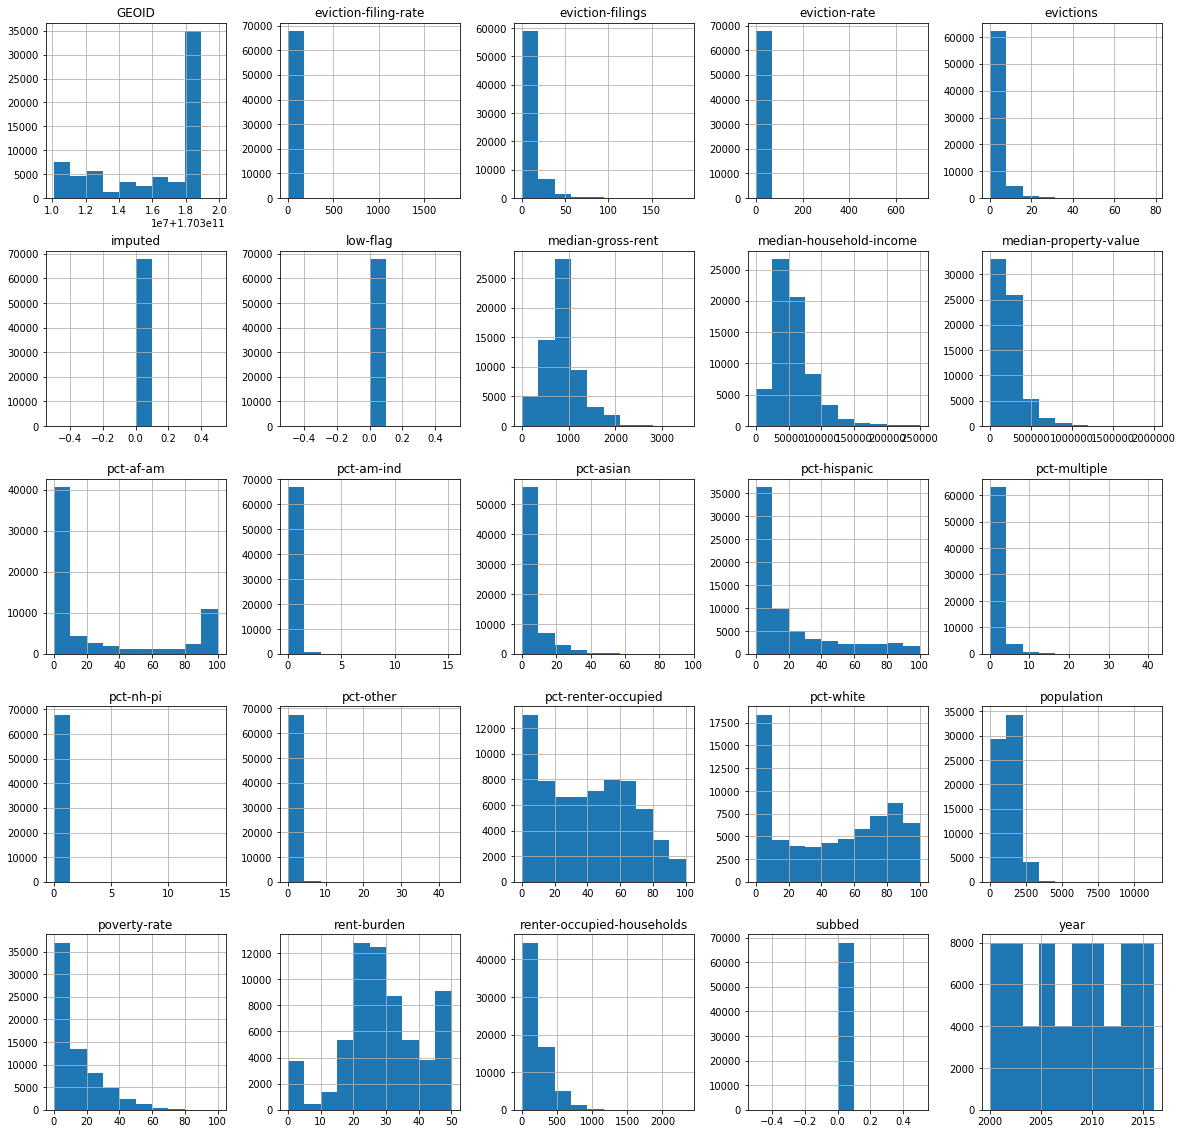

In [8]:
df.hist(figsize=(20,20))

It's clear that the variables `eviction-filing-rate` and `eviction_rate` have extreme outliers. To know more about this, we count the number of values above 100 they have:

In [9]:
len(df[df['eviction-filing-rate'] > 100])

40

In [10]:
len(df[df['eviction-rate'] > 100])

19

40 block groups have eviction filing rates above 100 and 19 have eviction rates above 100.

Total block groups per year:

In [11]:
df_count = df[df['year'] > 2011][['year']]
df_count['n'] = 1
df_count.groupby('year').sum()

,n
year,
2012,3993
2013,3993
2014,3993
2015,3993
2016,3993


Block are even across all the years we'll analyze.

Checking missing values on these specific years:

In [12]:
df[df['year']>2011].count()

GEOID                         19965
year                          19965
name                          19965
parent-location               19965
population                    19965
poverty-rate                  19965
renter-occupied-households    19965
pct-renter-occupied           19965
median-gross-rent             16025
median-household-income       19280
median-property-value         18995
rent-burden                   16405
pct-white                     19965
pct-af-am                     19965
pct-hispanic                  19965
pct-am-ind                    19965
pct-asian                     19965
pct-nh-pi                     19965
pct-multiple                  19965
pct-other                     19965
eviction-filings              19965
evictions                     19965
eviction-rate                 19965
eviction-filing-rate          19965
low-flag                      19965
imputed                       19965
subbed                        19965
dtype: int64

Checking correlations:

In [13]:
df.drop(['low-flag', 'imputed', 'subbed', 'GEOID'], axis=1).corr().style.background_gradient(cmap='coolwarm')

,year,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate
year,1,-0.0229595,0.0336791,0.0213105,0.0263006,0.344734,0.143318,0.130731,0.271891,-0.0750237,0.0013548,0.0706265,-0.00775576,0.060308,-0.0168397,0.0179981,0.00615177,-0.0258528,0.311934,0.111407,0.0190103
population,-0.0229595,1,-0.00675604,0.360946,0.023966,0.11372,0.030394,0.00690155,0.013802,-0.000342808,-0.13571,0.157432,-0.00448452,0.138838,0.0010961,0.0198438,-0.00517376,0.197819,0.131127,-0.0376001,-0.0382728
poverty-rate,0.0336791,-0.00675604,1,0.281017,0.579481,-0.158185,-0.586179,-0.333925,0.383777,-0.620268,0.508762,0.145342,0.0218585,-0.157401,-0.0121759,-0.0796717,-0.0122568,0.407733,0.269783,0.0466826,0.0658617
renter-occupied-households,0.0213105,0.360946,0.281017,1,0.735105,0.063779,-0.328073,0.0209039,0.120459,-0.186759,0.0816434,0.0708754,0.0407822,0.148137,0.0225856,0.109662,0.0296423,0.545728,0.357693,-0.0419526,-0.0507692
pct-renter-occupied,0.0263006,0.023966,0.579481,0.735105,1,-0.0129531,-0.564748,-0.135228,0.270541,-0.482174,0.315518,0.176312,0.0500648,0.00171336,0.0196884,0.0677365,0.0317067,0.505063,0.326557,-0.0138596,-0.0143771
median-gross-rent,0.344734,0.11372,-0.158185,0.063779,-0.0129531,1,0.296244,0.242452,0.343122,0.151248,-0.111104,-0.082829,-0.0153217,0.143309,-0.0152361,0.0615378,0.0085383,-0.0718686,0.0811983,0.0905328,-0.0491015
median-household-income,0.143318,0.030394,-0.586179,-0.328073,-0.564748,0.296244,1,0.666056,-0.369671,0.602361,-0.421296,-0.230465,-0.0183259,0.139436,-0.00902301,0.053501,-0.00364913,-0.36575,-0.220611,-0.0336077,-0.117724
median-property-value,0.130731,0.00690155,-0.333925,0.0209039,-0.135228,0.242452,0.666056,1,-0.181821,0.487539,-0.380924,-0.153857,0.00427824,0.173343,0.0102033,0.0623768,0.0210192,-0.219337,-0.105356,-0.0843101,-0.217709
rent-burden,0.271891,0.013802,0.383777,0.120459,0.270541,0.343122,-0.369671,-0.181821,1,-0.357068,0.305387,0.0496603,-0.00697868,-0.0681934,-0.0202303,-0.0251067,0.0174853,0.170208,0.2319,0.0688114,0.0425517
pct-white,-0.0750237,-0.000342808,-0.620268,-0.186759,-0.482174,0.151248,0.602361,0.487539,-0.357068,1,-0.720549,-0.322791,-0.0138767,0.15637,0.00674882,0.072934,-0.0189469,-0.388537,-0.275827,-0.0635068,-0.0908791


Apart from themselves, no variable is highly correlated with either `eviction-rate` or `eviction-filing-rate`. Anyways, We want to point out the following:
* `year` is the variable most correlated with `eviction-rate` (0.11), indicating that eviction rates have increased over time during the period we have data for. Interestingly, `year` is lowly correlated with `eviction-filing-rate` (0.02) suggesting that the increase over time in eviction filings has only been modest.
* `poverty-rate` is positively correlated with both variables, but the correlation is relatively low when compared to other variables (0.05 with `eviction-rate` and `0.07` with `eviction-filing-rate`.
* `median-gross-rent` is also more correlated with `eviction-rate` than almost all the other variables (0.09). This kind of makes sense -- areas where the rent is more expensive tend to have slightly higher eviction rates. Interestingly, though, the correlaction of this variable with `eviction-filing-rate` is negative and smaller in magnitude (-0.05). This might indicate that areas with more expensive rents have higher eviction/eviction filing ratios.
* `median-property-value` is also one of the variables most correlated with `eviction-rate` (-0.08). Besides, it is the most correlated variable with `eviction-filing-rate` (-0.22). This variable might be one of the best predictors we have in this dataset for our variables of interest
* `pct-white` is **negatively** correlated both with `eviction-rate` (-0.06) and `eviction-filing-rate` (-0.09), while `pct-af-am` is **positively** correlated (0.06 with `eviction-rate` and 0.1 with `eviction-filing-rate`). Interestingly, the magnitude of the correlations are almost the same, but in the opposite way

## Tabulating eviction rates / filing rates by year

We'll tabulate for the block groups with the upper eviction effectiveness in their respective years.

* Entire block groups

In [41]:
col = 'evictions'
dic = {}
df_a = pd.DataFrame(columns=('GEOID', 'year', col, 'decile_by_year', 'upper10th_by_year'))
for year in [2012, 2013, 2014, 2015, 2016]:
    temp_df = df[df['year']==year][['year', 'GEOID', col]]
    temp_df['decile_by_year'] = pd.qcut(temp_df[col].rank(method='first'), 10, labels=False)
    temp_df.loc[(temp_df['decile_by_year'] == 9), 'upper10th_by_year'] = 1
    temp_df.loc[(temp_df['decile_by_year'] < 9), 'upper10th_by_year'] = 0
    df_a = df_a.append(temp_df, ignore_index=True)

In [15]:
df_a

,GEOID,decile_by_year,evictions,upper10th_by_year,year
0,170310101001,7,7.0,0.0,2012
1,170310101002,9,32.0,1.0,2012
2,170310101003,9,31.0,1.0,2012
3,170310102011,9,24.0,1.0,2012
4,170310102012,9,31.0,1.0,2012
5,170310102013,3,2.0,0.0,2012
6,170310102021,8,10.0,0.0,2012
7,170310102022,9,24.0,1.0,2012
8,170310103001,6,5.0,0.0,2012
9,170310103002,8,9.0,0.0,2012


In [16]:
df = df.merge(df_a)

In [17]:
df_upper = df[df['upper10th_by_year']==1]
df1 = df_upper[['year', 'eviction-filings', 'evictions', 'renter-occupied-households']].groupby('year').sum()
df1['eviction-rates'] = df1['evictions'] / df1['renter-occupied-households'] * 100
df1['eviction-filing-rates'] = df1['eviction-filings'] / df1['renter-occupied-households'] * 100
df1['group'] = 'All block groups'
df1

,eviction-filings,evictions,renter-occupied-households,eviction-rates,eviction-filing-rates,group
year,,,,,,
2012,14323.0,6809.0,166542.0,4.088458,8.600233,All block groups
2013,14017.0,6248.0,163533.0,3.820636,8.571359,All block groups
2014,13472.0,5850.0,162820.0,3.592925,8.274168,All block groups
2015,12992.0,5417.0,160249.0,3.380364,8.107383,All block groups
2016,11800.0,5050.0,167375.0,3.017177,7.050037,All block groups


* Block groups with white population lower than 50%

In [18]:
df2 = df_upper[df_upper['pct-white']<50]
df2 = df2[['year', 'eviction-filings', 'evictions', 'renter-occupied-households']].groupby('year').sum()
df2['eviction-rates'] = df2['evictions'] / df2['renter-occupied-households'] * 100
df2['eviction-filing-rates'] = df2['eviction-filings'] / df2['renter-occupied-households'] * 100
df2['group'] = 'BG where white population < 50%'
df2

,eviction-filings,evictions,renter-occupied-households,eviction-rates,eviction-filing-rates,group
year,,,,,,
2012,12453.0,5894.0,134407.0,4.385188,9.265142,BG where white population < 50%
2013,12434.0,5483.0,133851.0,4.096346,9.289434,BG where white population < 50%
2014,12372.0,5349.0,140233.0,3.814366,8.822460,BG where white population < 50%
2015,11680.0,4854.0,134776.0,3.601531,8.666231,BG where white population < 50%
2016,10767.0,4630.0,142295.0,3.253804,7.566675,BG where white population < 50%


* Block groups with poverty rates higher than 20%

In [19]:
df3 = df_upper[df_upper['poverty-rate'] > 30]
df3 = df3[['year', 'eviction-filings', 'evictions', 'renter-occupied-households']].groupby('year').sum()
df3['eviction-rates'] = df3['evictions'] / df3['renter-occupied-households'] * 100
df3['eviction-filing-rates'] = df3['eviction-filings'] / df3['renter-occupied-households'] * 100
df3['group'] = 'BG where median poverty rate > 30%'
df3

,eviction-filings,evictions,renter-occupied-households,eviction-rates,eviction-filing-rates,group
year,,,,,,
2012,5867.0,2725.0,59035.0,4.615906,9.938172,BG where median poverty rate > 30%
2013,6007.0,2604.0,60783.0,4.284093,9.882697,BG where median poverty rate > 30%
2014,6146.0,2617.0,65245.0,4.011035,9.419879,BG where median poverty rate > 30%
2015,6217.0,2610.0,66117.0,3.947548,9.403028,BG where median poverty rate > 30%
2016,5470.0,2321.0,66912.0,3.468735,8.174916,BG where median poverty rate > 30%


* Block groups with rent burden higher than 50%

In [20]:
df4 = df_upper[df_upper['rent-burden']==50]
df4 = df4[['year', 'eviction-filings', 'evictions', 'renter-occupied-households']].groupby('year').sum()
df4['eviction-rates'] = df4['evictions'] / df4['renter-occupied-households'] * 100
df4['eviction-filing-rates'] = df4['eviction-filings'] / df4['renter-occupied-households'] * 100
df4['group'] = 'BG with median rent burden > 50%'
df4

,eviction-filings,evictions,renter-occupied-households,eviction-rates,eviction-filing-rates,group
year,,,,,,
2012,2345.0,1214.0,22874.0,5.307336,10.251814,BG with median rent burden > 50%
2013,2375.0,1131.0,21519.0,5.255820,11.036758,BG with median rent burden > 50%
2014,2425.0,1087.0,22068.0,4.925684,10.988762,BG with median rent burden > 50%
2015,2638.0,1126.0,27343.0,4.118056,9.647807,BG with median rent burden > 50%
2016,2293.0,1017.0,26741.0,3.803149,8.574848,BG with median rent burden > 50%


In [21]:
df5 = df_upper[df_upper['pct-af-am']>50]
df5 = df5[['year', 'eviction-filings', 'evictions', 'renter-occupied-households']].groupby('year').sum()
df5['eviction-rates'] = df5['evictions'] / df5['renter-occupied-households'] * 100
df5['eviction-filing-rates'] = df5['eviction-filings'] / df5['renter-occupied-households'] * 100
df5['group'] = 'BG where African American population > 50%'
df5

,eviction-filings,evictions,renter-occupied-households,eviction-rates,eviction-filing-rates,group
year,,,,,,
2012,9245.0,4277.0,86398.0,4.950346,10.700479,BG where African American population > 50%
2013,9638.0,4210.0,94063.0,4.475724,10.246324,BG where African American population > 50%
2014,9744.0,4116.0,100234.0,4.106391,9.721252,BG where African American population > 50%
2015,9831.0,4056.0,104008.0,3.899700,9.452158,BG where African American population > 50%
2016,8906.0,3814.0,105674.0,3.609213,8.427806,BG where African American population > 50%


In [22]:
df6 = df_upper[df_upper['pct-hispanic']>50]
df6 = df6[['year', 'eviction-filings', 'evictions', 'renter-occupied-households']].groupby('year').sum()
df6['eviction-rates'] = df6['evictions'] / df6['renter-occupied-households'] * 100
df6['eviction-filing-rates'] = df6['eviction-filings'] / df6['renter-occupied-households'] * 100
df6['group'] = 'BG where Hispanic/Latino population > 50%'
df6

,eviction-filings,evictions,renter-occupied-households,eviction-rates,eviction-filing-rates,group
year,,,,,,
2012,916.0,494.0,11464.0,4.309142,7.990230,BG where Hispanic/Latino population > 50%
2013,766.0,404.0,9099.0,4.440048,8.418508,BG where Hispanic/Latino population > 50%
2014,892.0,476.0,11307.0,4.209782,7.888918,BG where Hispanic/Latino population > 50%
2015,674.0,341.0,10461.0,3.259727,6.442979,BG where Hispanic/Latino population > 50%
2016,683.0,324.0,11223.0,2.886929,6.085717,BG where Hispanic/Latino population > 50%


Wrapping up all this in one graph

In [23]:
df_plot = pd.concat([df1, df3], sort=True)
df_plot = pd.concat([df_plot, df4], sort=True)
df_plot = pd.concat([df_plot, df5], sort=True)
df_plot = pd.concat([df_plot, df6], sort=True)
df_plot['year'] = df_plot.index
df_plot['evictions-to-eviction-notices-ratio'] = df_plot['evictions'] / df_plot['eviction-filings'] * 100
df_plot

,eviction-filing-rates,eviction-filings,eviction-rates,evictions,group,renter-occupied-households,year,evictions-to-eviction-notices-ratio
year,,,,,,,,
2012,8.600233,14323.0,4.088458,6809.0,All block groups,166542.0,2012,47.538923
2013,8.571359,14017.0,3.820636,6248.0,All block groups,163533.0,2013,44.574445
2014,8.274168,13472.0,3.592925,5850.0,All block groups,162820.0,2014,43.423397
2015,8.107383,12992.0,3.380364,5417.0,All block groups,160249.0,2015,41.694889
2016,7.050037,11800.0,3.017177,5050.0,All block groups,167375.0,2016,42.796610
2012,9.938172,5867.0,4.615906,2725.0,BG where median poverty rate > 30%,59035.0,2012,46.446225
2013,9.882697,6007.0,4.284093,2604.0,BG where median poverty rate > 30%,60783.0,2013,43.349426
2014,9.419879,6146.0,4.011035,2617.0,BG where median poverty rate > 30%,65245.0,2014,42.580540
2015,9.403028,6217.0,3.947548,2610.0,BG where median poverty rate > 30%,66117.0,2015,41.981663


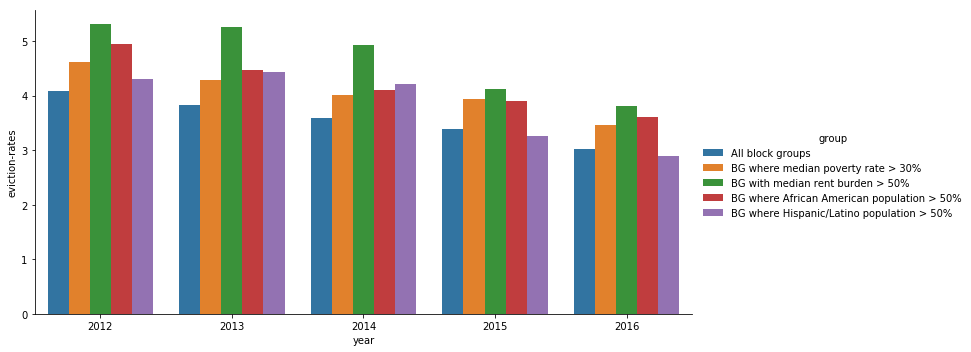

In [24]:
graph_by_year_er = sns.catplot(x='year', y='eviction-rates', data=df_plot, aspect=2, kind='bar', hue='group')

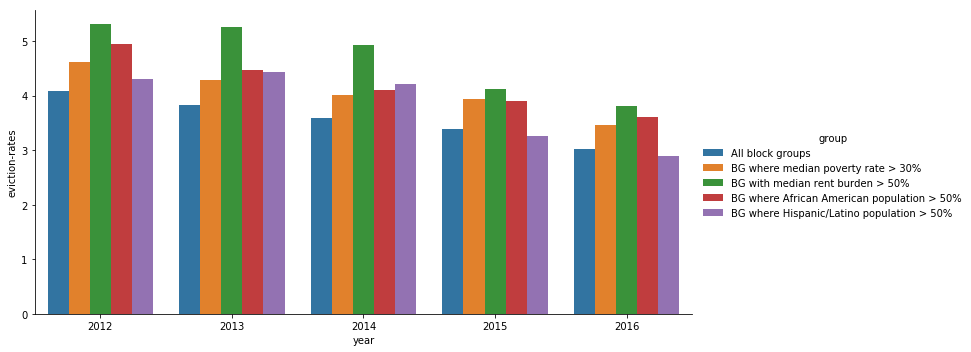

In [25]:
graph_by_year_efr = sns.catplot(x='year', y='eviction-rates', data=df_plot[df_plot['year']>2005], aspect=2, kind='bar', hue='group')

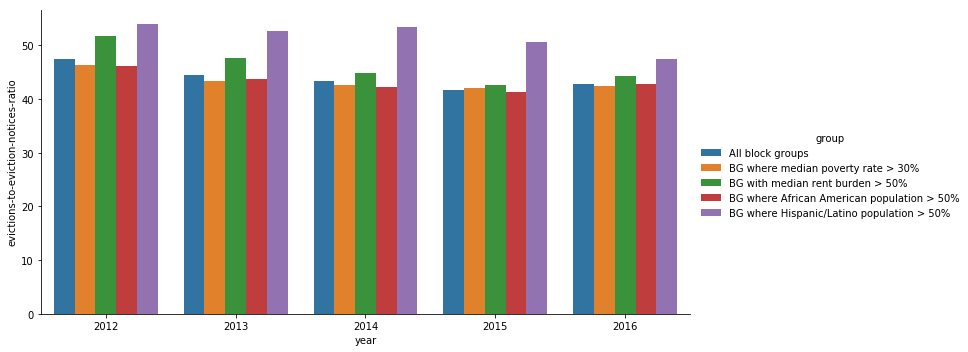

In [26]:
graph_by_year_er = sns.catplot(x='year', y='evictions-to-eviction-notices-ratio', data=df_plot[df_plot['year']>2005], aspect=2, kind='bar', hue='group')

## And now the maps

Finally, you got to the maps part. I hope it was worth to wait.

Reding the dataframe in geopandas:

In [27]:
import geopandas as gpd
gdf = gpd.read_file('../data/raw/block-groups.geojson')
len(gdf)

9689

Filtering out block groups out of the Cook County:

In [28]:
gdf = gdf[gdf['pl']=='Cook County, Illinois']
len(gdf)

3992

We reduced the geodataframe to only 3,992 block groups.

Looking into some datapoints of the geodataframe:

In [29]:
gdf.head()

,GEOID,west,south,east,north,n,pl,p-00,pr-00,roh-00,...,pm-16,po-16,ef-16,e-16,er-16,efr-16,lf-16,imputed-16,subbed-16,geometry
0,170310306041,-87.6567,41.9837,-87.6531,41.9855,306.04.1,"Cook County, Illinois",1349.63,30.75,782.0,...,3.93,0.0,26.0,0.0,0.00,2.85,0,0,0,"(POLYGON ((-87.655192 41.983802, -87.655914999..."
1,170310306042,-87.6553,41.9839,-87.6511,41.9881,306.04.2,"Cook County, Illinois",1219.73,16.60,263.0,...,4.17,0.0,16.0,6.0,2.82,7.51,0,0,0,(POLYGON ((-87.65111443516709 41.9840326124377...
2,170310306043,-87.6567,41.9855,-87.6552,41.9874,306.04.3,"Cook County, Illinois",898.64,27.12,534.0,...,1.21,0.0,17.0,2.0,0.41,3.47,0,0,0,"(POLYGON ((-87.656031 41.987344, -87.655303 41..."
3,170310307011,-87.6601,41.9818,-87.6559,41.9837,307.01.1,"Cook County, Illinois",1464.41,22.08,668.0,...,6.97,0.0,23.0,5.0,0.62,2.85,0,0,0,"(POLYGON ((-87.66006899999999 41.983622, -87.6..."
4,170310307021,-87.6551,41.9799,-87.6543,41.9807,307.02.1,"Cook County, Illinois",1736.21,14.31,355.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0,0,0,"(POLYGON ((-87.65454699999999 41.980646, -87.6..."


Plotting the block groups:

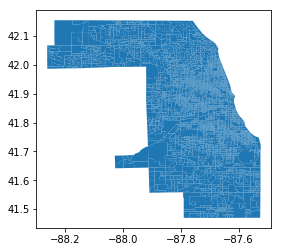

In [30]:
gdf.plot()

The plot makes sense. Now we'll try plotting some of the features we have:

* Population

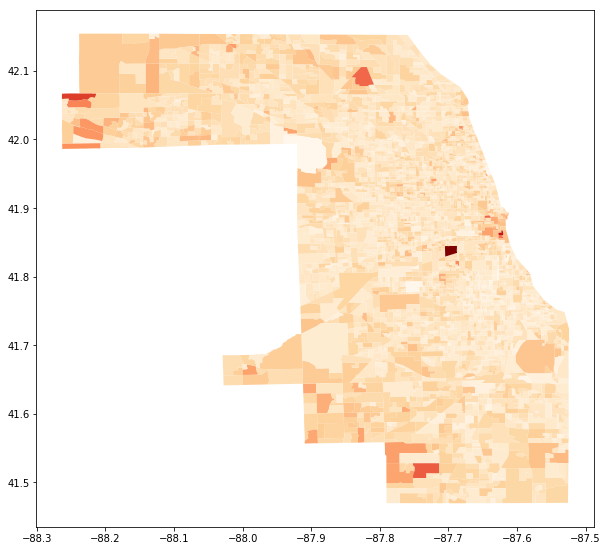

In [31]:
gdf.plot(column='p-16', cmap='OrRd', figsize=(10,10))

Interesting. Block groups are bigger nearby the Loop, and they are clearly more densely populated. But in general, looks like almost all of them have similar populations.

* Poverty rate:

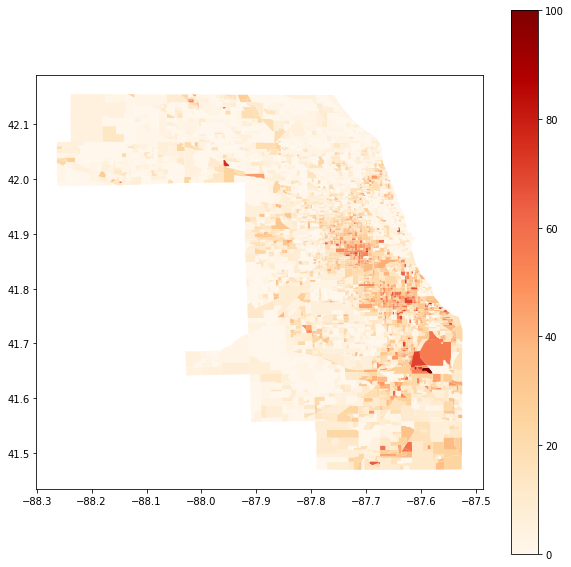

In [32]:
gdf.plot(column='pr-16', cmap='OrRd', figsize=(10,10), legend=True)

There's a clear spatial correlation with the poverty rate in Chicago.

* Percentage of white population:

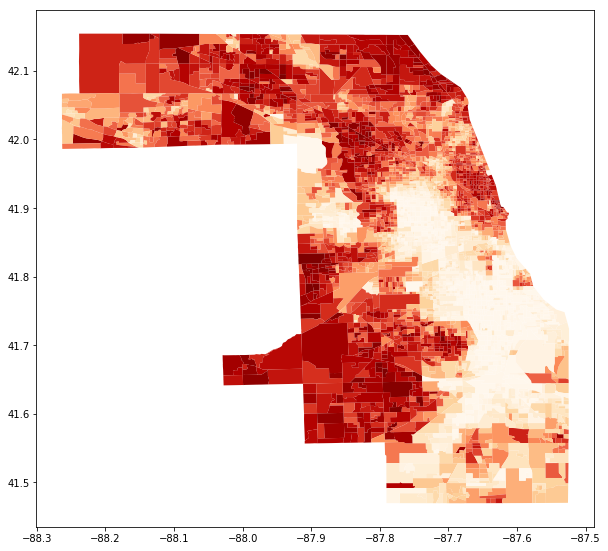

In [33]:
gdf.plot(column='pw-16', cmap='OrRd', figsize=(10,10))

There's a stark constrast between this map and the previous one. If we look back into the correlation matri, we'll also see that the correlation between `poverty-rate` and `pct-white` is largely negative: -0.62.

* Percentage of African American Population:

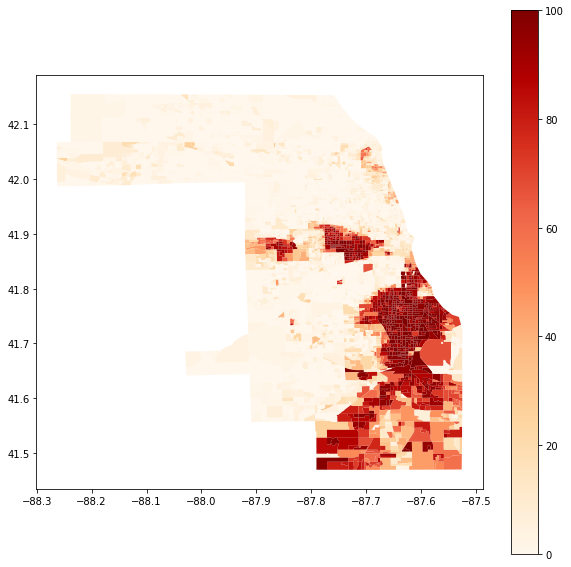

In [34]:
gdf.plot(column='paa-16', cmap='OrRd', figsize=(10,10), legend=True)

Not surprisingly, this map seems to be more correlated with poverty rate.

    * Hispanic/Latinos:

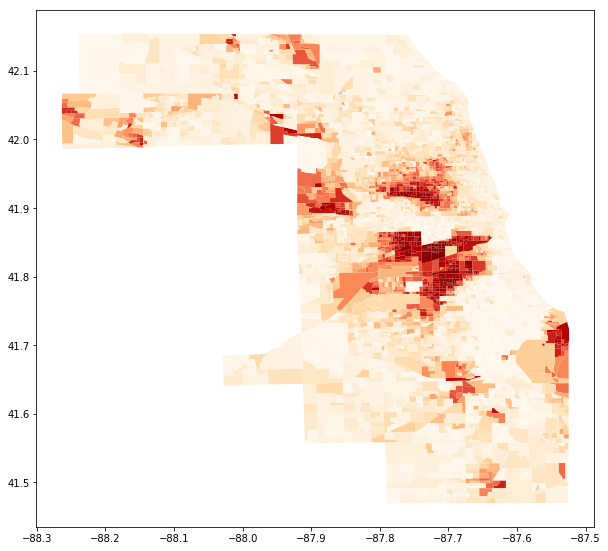

In [35]:
gdf.plot(column='ph-16', cmap='OrRd', figsize=(10,10))

It seems that if we overlapped the Hispanic/Latinos and African American population maps, we'd get something very correlated with the poverty rate. Of course, this is no surprise.

Now we'll check the eviction rates and eviction filing rates:

* Eviction Rates -- notice that I'm only keeping the  block groups with eviction rates equal or lower than 100 to discard the extreme outliers we saw in the histogram

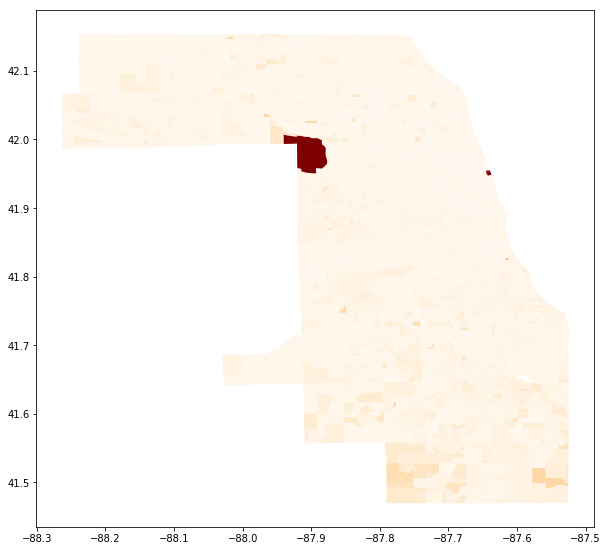

In [36]:
gdf[gdf['er-16']<=100].plot(column='er-16', cmap='OrRd', figsize=(10,10))

This map is tricky. Apart from 4-5 clear outliers, it doesn't seem to have clear spatial patterns. My guess is that the colors of the plot are defined by equal intervals between the min/max values the column has, so the few outliers we kept (`eviction rate`=100) are the only observations that get to be heterogenous among all the other block groups.

Because of that, we'll try constructing intervals defined by quantiles, not by equal distributions:

In [37]:
import mapclassify
# if this doesn't run, try installing the package first: pip install mapclassify

/home/lsanmartin/.local/lib/python3.5/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/home/lsanmartin/.local/lib/python3.5/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 8
  Warn('Warning: setting k to %d' % k_q, UserWarning)


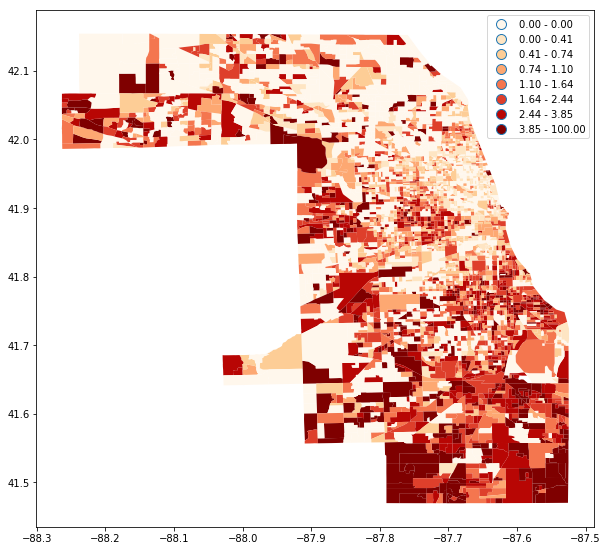

In [38]:
gdf[gdf['er-16']<=100].plot(column='er-16', cmap='OrRd', scheme='quantiles', figsize=(10,10), legend=True, k=10)

This map looks better, but still the spatial correlation/grouping of the block groups with more eviction rates doesn't seem to be obvious. There seems to be grouping in the south side and in the west of the Loop (areas with more African American population), but in general evictions are happening all around Chicago. This kind of makes sense with the results we saw in the correlation matrix, where only a few variables were slightly correlated with eviction rates.

I think setting our own color intervals would be ideal, but apparently we can't do that when using geopandas.plot(), and setting it ourselves would be complex (https://stackoverflow.com/questions/41783090/plotting-a-choropleth-map-with-geopandas-using-a-user-defined-classification-s/41785086)

Checking eviction filing rates, same map settings:

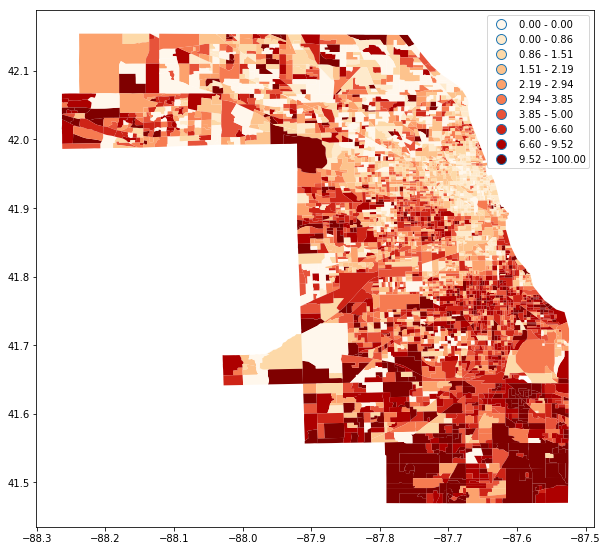

In [39]:
gdf[gdf['efr-16']<=100].plot(column='efr-16', cmap='OrRd', scheme='quantiles', figsize=(10,10), legend=True, k=10)

I think this maps shows a *slightly* clearer spatial correlation than the previous one. For instance, there are clear clusters of block groups with higher eviction filing rates in the west and south of the Loop, which we saw are areas with a majority of African American population. Another thing is that the deep South Side clearly concentrate clusters of block groups where the eviction filing rates are even higher than 9.5%.